In [1]:
# ===============================================================================================================#
#
# Copyright 2021 Infosys Ltd.
# Use of this source code is governed by Apache License Version 2.0 that can be found in the LICENSE file or at
# http://www.apache.org/licenses/
#
# ===============================================================================================================#

## 1. Preparation

In [2]:
from libraries._internal_utils.demo_helper import DemoHelper
import pandas as pd
from IPython.display import Image

#### <span style='color:blue'>Enter image and OCR file paths</span>

In [3]:
IMAGE_PATHS=["./data/coi_1.jpg", "./data/coi_2.jpg"]
IMAGE_OCR_PATHS=['./data/coi_1.jpg.hocr', './data/coi_2.jpg.hocr']

#### Visualize

In [4]:
tab_widget = DemoHelper.create_tab_toolbar(IMAGE_PATHS)
display(tab_widget)
for idx, image_path in enumerate(IMAGE_PATHS):
    with tab_widget.children[idx]:
        display(Image(filename=image_path, width=1000, height=50))

<!-- #### Util Method to Plot response region on Image -->

## 2. Initialization

#### <span style='color:blue'>Create new instance with desired OCR service provider</span>

<!-- ### 1.1. Example -  Create Instance - Without logging -->

In [5]:
import json
import logging
import os

from infy_ocr_parser import ocr_parser
from infy_ocr_parser.providers.tesseract_ocr_data_service_provider import TesseractOcrDataServiceProvider

ocr_file_list = IMAGE_OCR_PATHS

if not os.path.exists("./logs"):
    os.makedirs("./logs")
logging.basicConfig(
    filename=("./logs" + "/app_log.log"),
    format="%(asctime)s- %(levelname)s- %(message)s",
    level=logging.INFO,
    datefmt="%d-%b-%y %H:%M:%S",
)
logger = logging.getLogger()
data_service_provider_obj = TesseractOcrDataServiceProvider()

ocr_parse_obj = ocr_parser.OcrParser(ocr_file_list=ocr_file_list,
                                     data_service_provider=data_service_provider_obj,
                                     logger=logger)

2022-04-03 20:32:00,823.823 INFO [MainThread] [data_service_provider_interface] [__set_logger:114] log initialized


## 3. API - get_bbox_for()

### 3.1. Single-line anchor text match using 'regex' method

In [6]:
reg_def_dict_list=[
    {
        "anchorText": [
            "^Insurer.?[1-4]?"
        ],
        "anchorTextMatch":{
            'method': 'regex'
        },
        "anchorPoint1": {
            "left": 0,
            "top": 0,
            "right": None,
            "bottom": None},
        "anchorPoint2": {
            "left": None,
            "top": None,
            "right": 0,
            "bottom": 0
        }
    }
]
result = ocr_parse_obj.get_bbox_for(reg_def_dict_list)

#### Output

In [7]:
# print(json.dumps(result, indent=4))

#### Visualize

page = 1
anchor_text_bboxes = [[1260, 785, 147, 19]]
region_bboxes = [[1260, 785, 147, 19]]


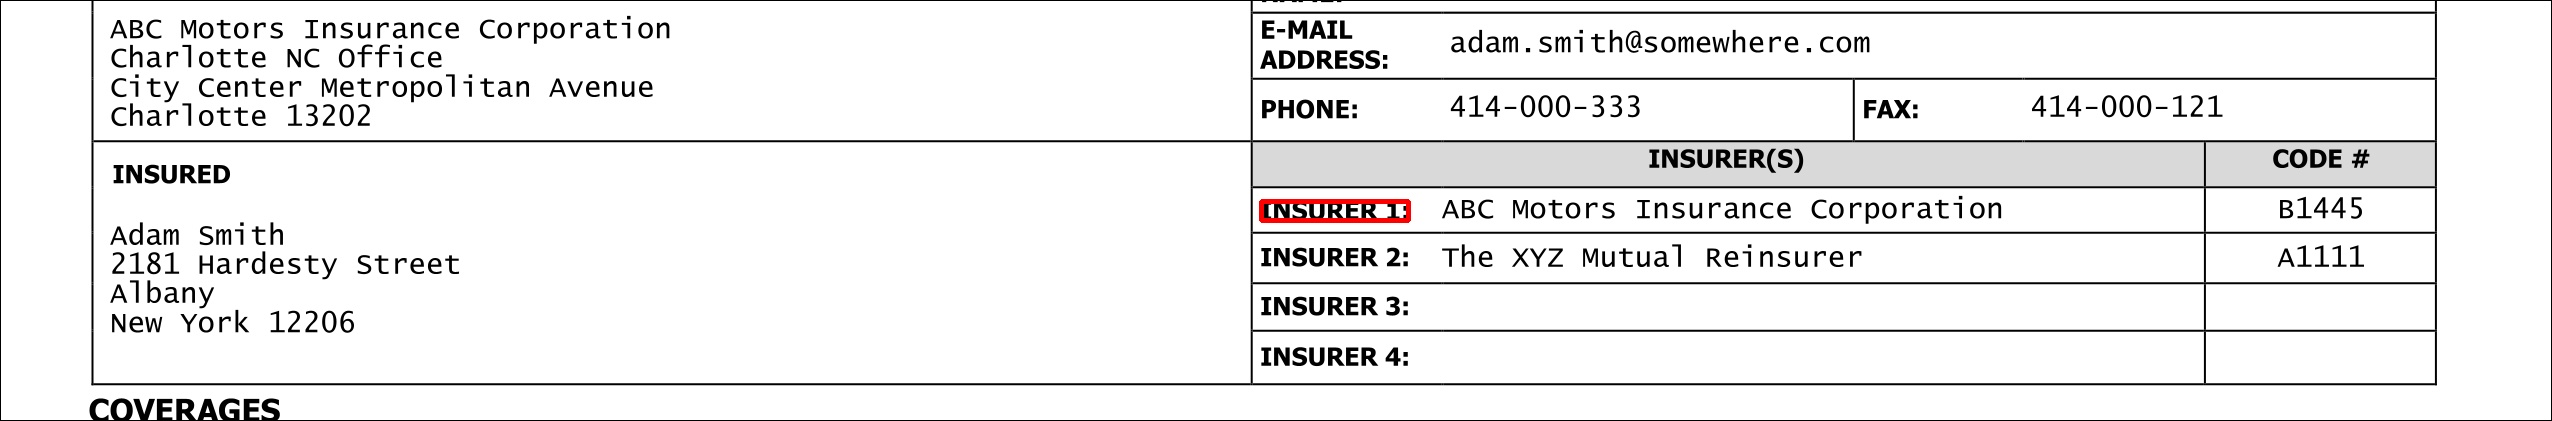

page = 1
anchor_text_bboxes = [[1260, 832, 147, 19]]
region_bboxes = [[1260, 832, 147, 19]]


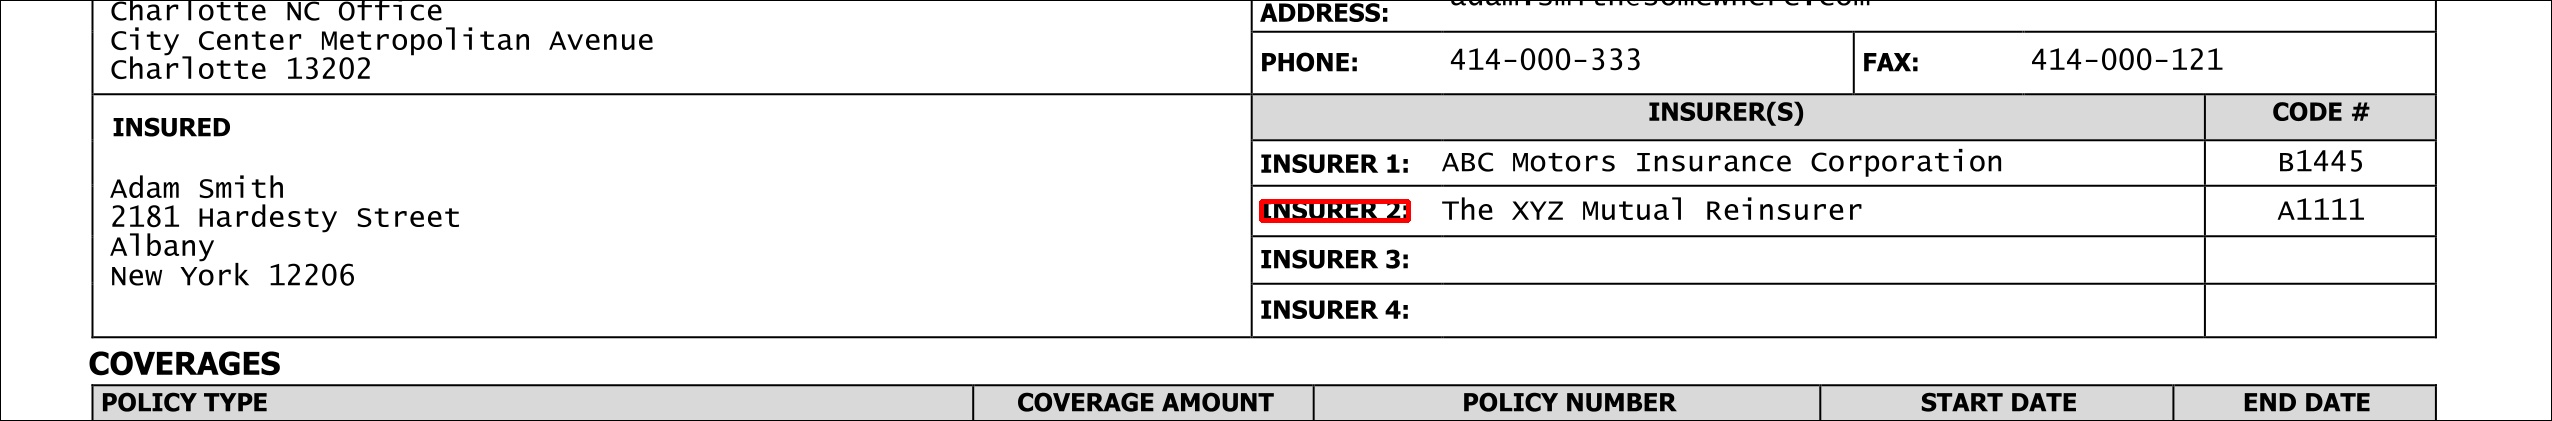

page = 1
anchor_text_bboxes = [[1260, 881, 147, 19]]
region_bboxes = [[1260, 881, 147, 19]]


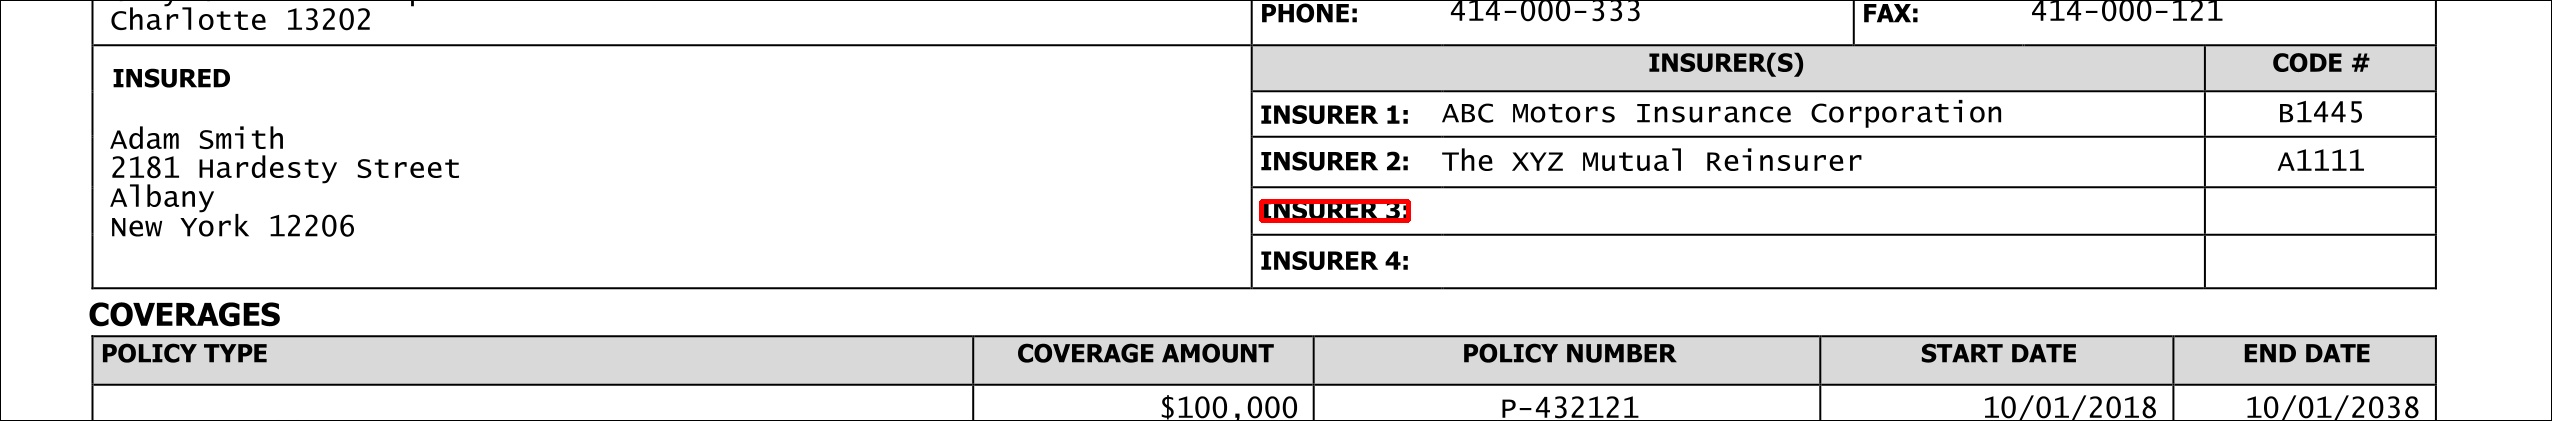

page = 1
anchor_text_bboxes = [[1260, 931, 147, 19]]
region_bboxes = [[1260, 931, 147, 19]]


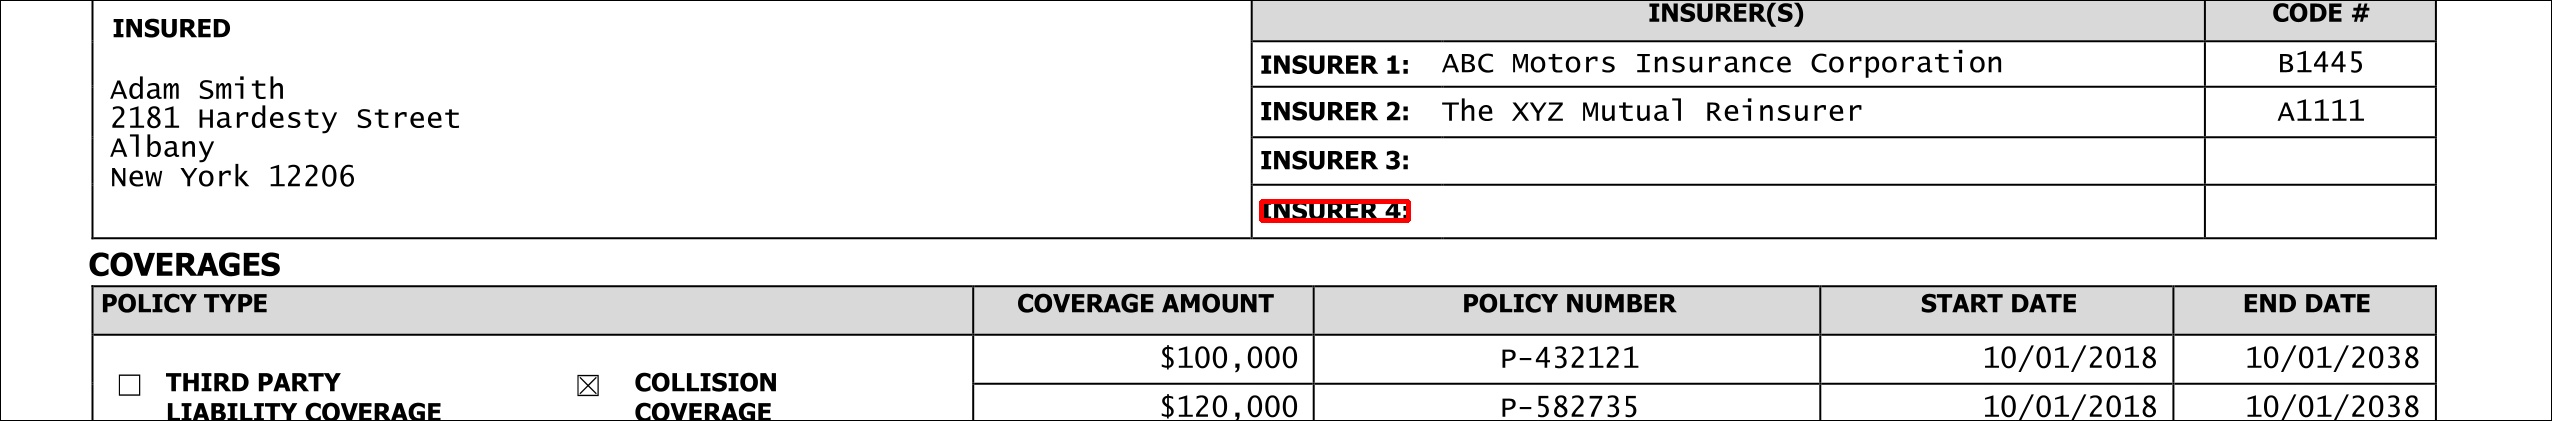

page = 1
anchor_text_bboxes = [[1648, 718, 150, 44]]
region_bboxes = [[1648, 718, 150, 44]]


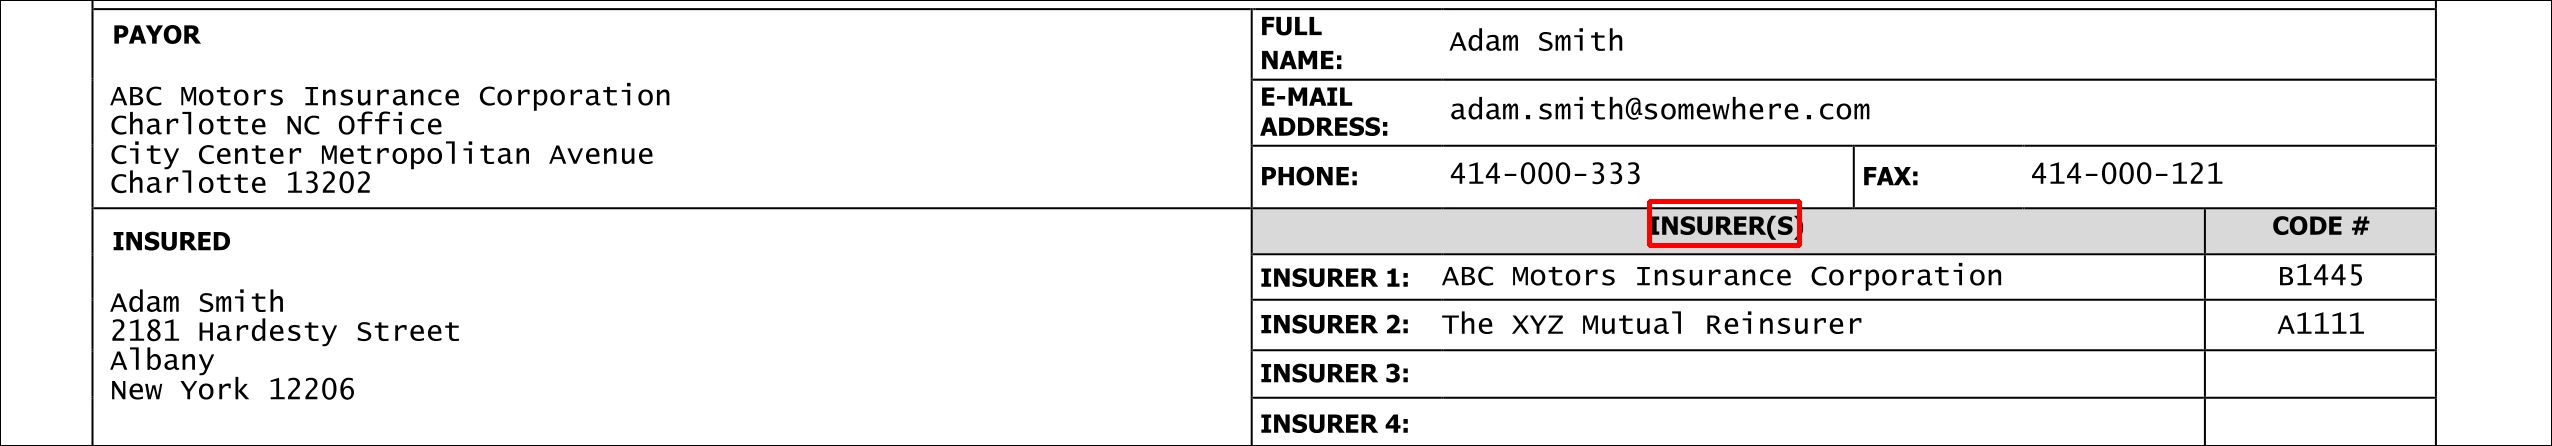

In [8]:
DemoHelper.visualize_get_bbox_for_result(result, IMAGE_PATHS)

1. Using `anchorText` will get right side of value region by finding two rectangle points.
1. For the 1st point use `anchorPoint1` and here it is `top-left`(0, 0) corner of `anchorText`.
1. For the 2nd point use `anchorPoint2` and from `bottom-right`(0, 0) corner of `anchorText`, move 2 px down and 2 px right.

### 3.2. Single-line and Two anchor text match using 'regex' method

In [9]:
reg_def_dict_list = [
    {
        "anchorText": [
            "^Payor"
        ],
        "anchorTextMatch":{
            'method': 'regex'
        },
        "anchorPoint1": {
            "left": 0, 
            "top": None,
            "right": None, 
            "bottom": 0
        }
    },
    {
        "anchorText": [
            "^Insured"
        ],
        "anchorTextMatch":{
            'method': 'regex'
        },
        "anchorPoint1": {
            "left": None, 
            "top": 0,
            "right": "30%r", 
            "bottom": None
        }
    }
]
result = ocr_parse_obj.get_bbox_for(reg_def_dict_list)

#### Output

In [10]:
# print(json.dumps(result, indent=4))

#### Visualize

page = 1
anchor_text_bboxes = [[113, 542, 87, 19], [113, 749, 113, 19]]
region_bboxes = [[113, 561, 810, 188]]


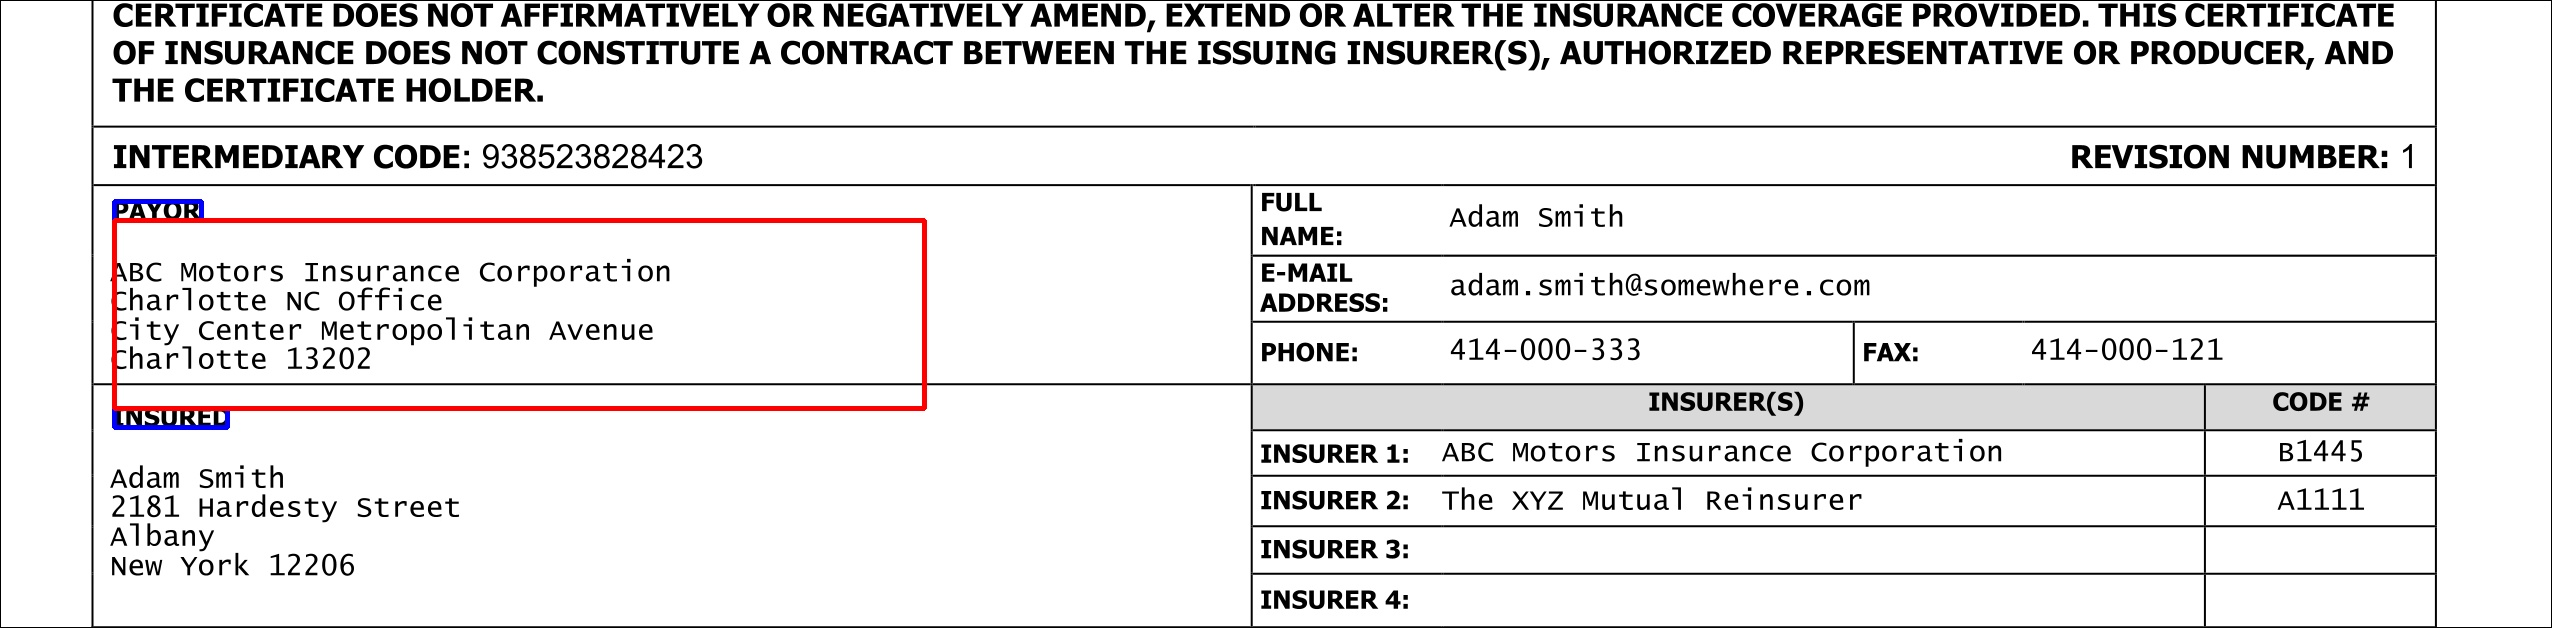

In [11]:
DemoHelper.visualize_get_bbox_for_result(result, IMAGE_PATHS)

1. Using two `anchorText` will get in between value region by finding two rectangle points. Here consider First Name label and it's values there in separate lines.
1. For the 1st point use 1st object `anchorPoint1` and here it is `top-right`(0, 0) corner of `anchorText`.
1. For the 2nd point use 2nd object `anchorPoint1` and here it is top: 0px, right: 30%corner of `anchorText`.

### 3.3. Multiline anchor text match using 'regex' method

In [12]:
reg_def_dict_list = [
    {
        "anchorText": [
            "Full", "Name.*"
        ],
        "anchorTextMatch":{
            'method': 'regex'
        },
        "anchorPoint1": {
            "left": 0, 
            "top": 0,
            "right": None, 
            "bottom": None
        },
        "anchorPoint2": {
            "left": None, 
            "top": None,
            "right": 0, 
            "bottom": 0
        }
    }
]
result = ocr_parse_obj.get_bbox_for(reg_def_dict_list)

#### Output

In [13]:
# print(json.dumps(result, indent=4))

#### Visualize

page = 1
anchor_text_bboxes = [[1261, 534, 79, 56]]
region_bboxes = [[1261, 534, 79, 56]]


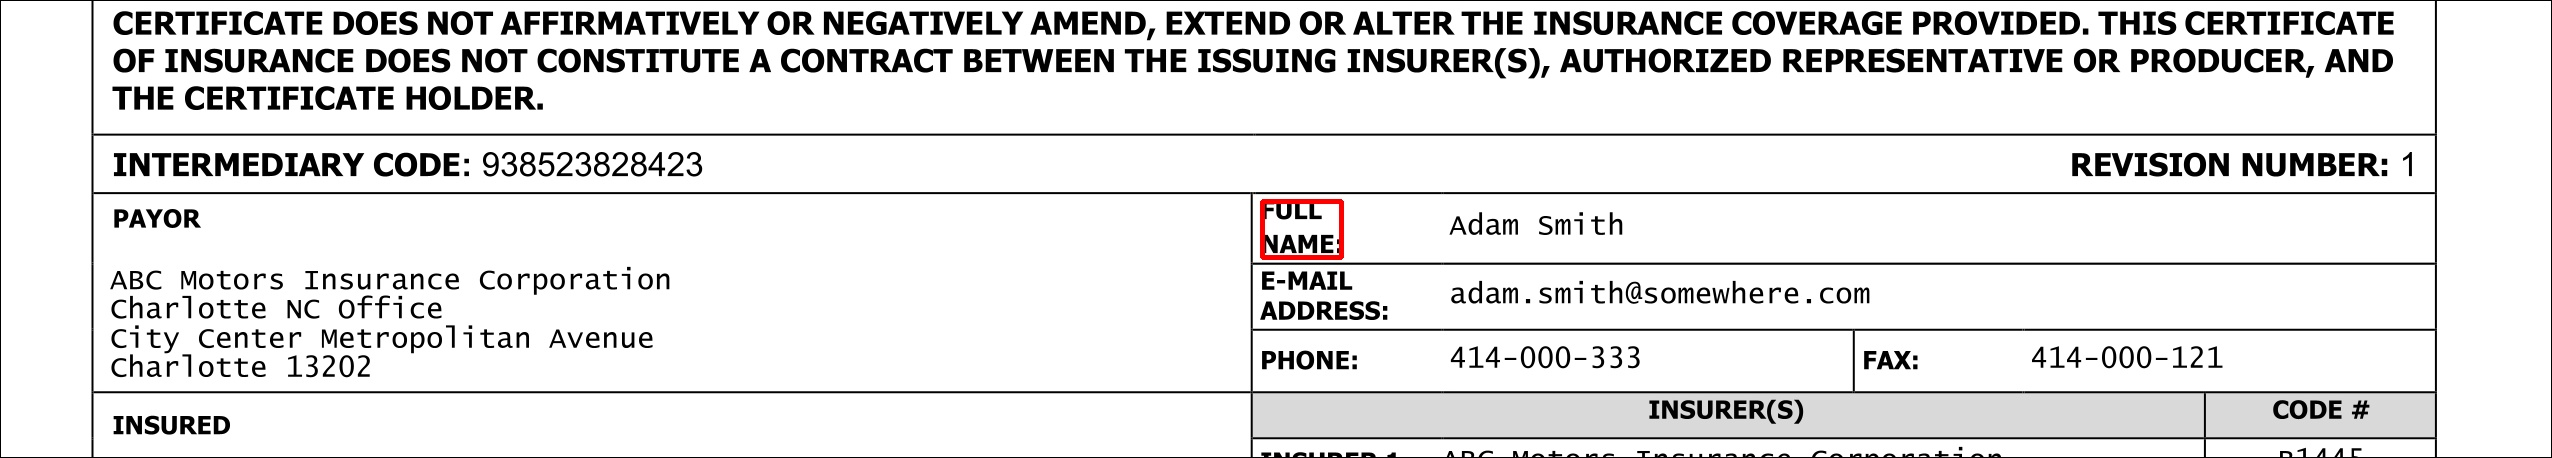

In [14]:
DemoHelper.visualize_get_bbox_for_result(result, IMAGE_PATHS)

1. Using `anchorText` will get right side of value region by finding two rectangle points.
1. For the 1st point use `anchorPoint1` and here it is `top-right`(0, 0) corner of `anchorText`.
1. For the 2nd point use `anchorPoint2` and here it is `top-right`(0, 0) corner of `anchorText`.
1. Each word in a `anchorText` list is considered to be consecutive lines.

### 3.4. Synonyms - Multiline anchor text match using 'regex' method

In [15]:
reg_def_dict_list = [
    {
        "anchorText": [
            ["COMPREHENSIVE", "COLLISION", "UNINSURED.*", "THIRD.*", "PERSONAL.*"],
            [".*"],
            ["COVERAGE"]
        ],
        "anchorTextMatch":{
            'method': 'regex'
        },
        "anchorPoint1": {
            "left": 0, 
            "top": 0,
            "right": None, 
            "bottom": None
        },
        "anchorPoint2": {
            "left": None, 
            "top": None,
            "right": 0, 
            "bottom": 0
        }
    }
]
result = ocr_parse_obj.get_bbox_for(reg_def_dict_list)

#### Output

In [16]:
# print(json.dumps(result, indent=4))

#### Visualize

page = 1
anchor_text_bboxes = [[166, 1258, 220, 49]]
region_bboxes = [[166, 1258, 220, 49]]


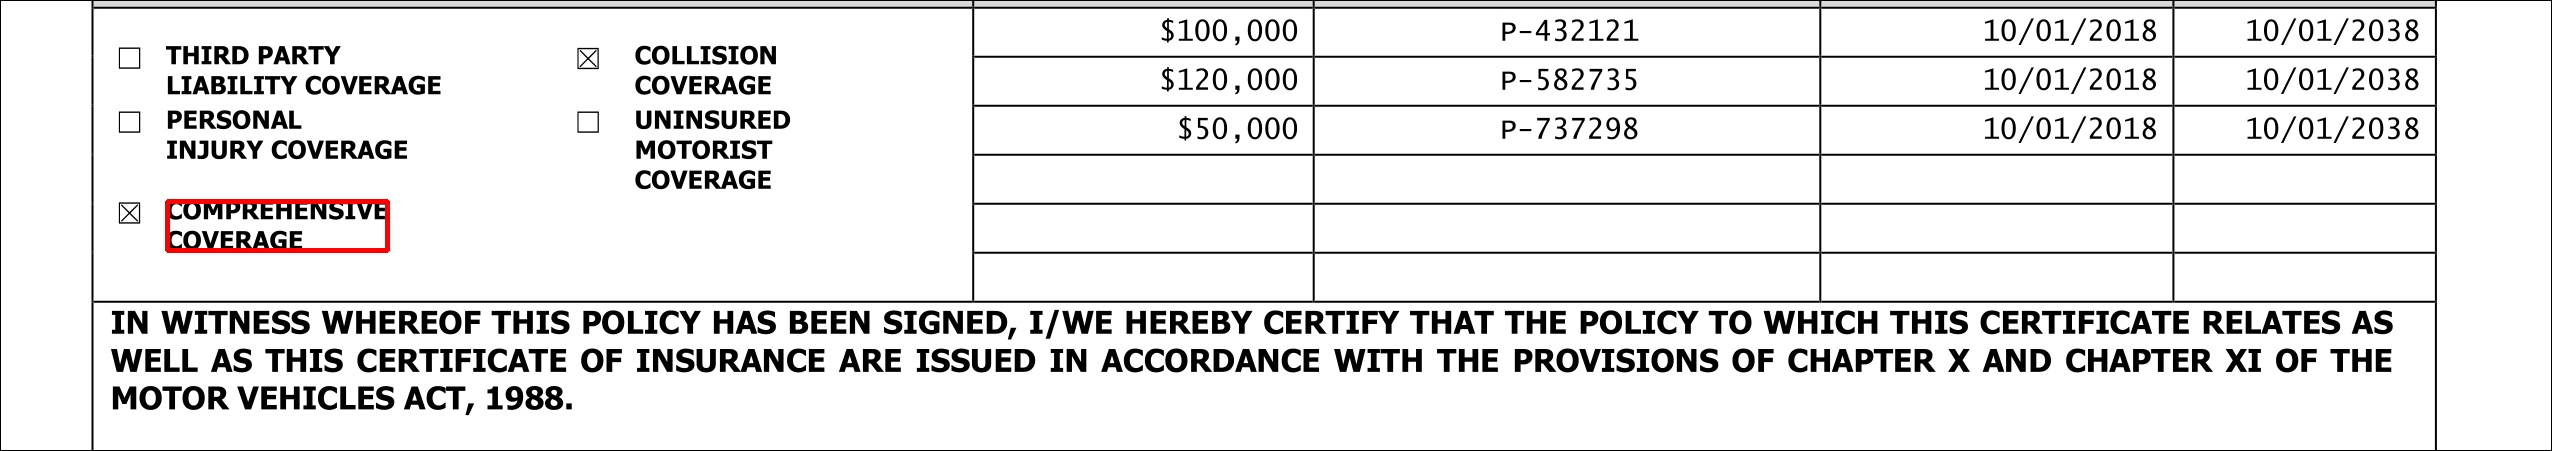

page = 1
anchor_text_bboxes = [[634, 1103, 141, 54]]
region_bboxes = [[634, 1103, 141, 54]]


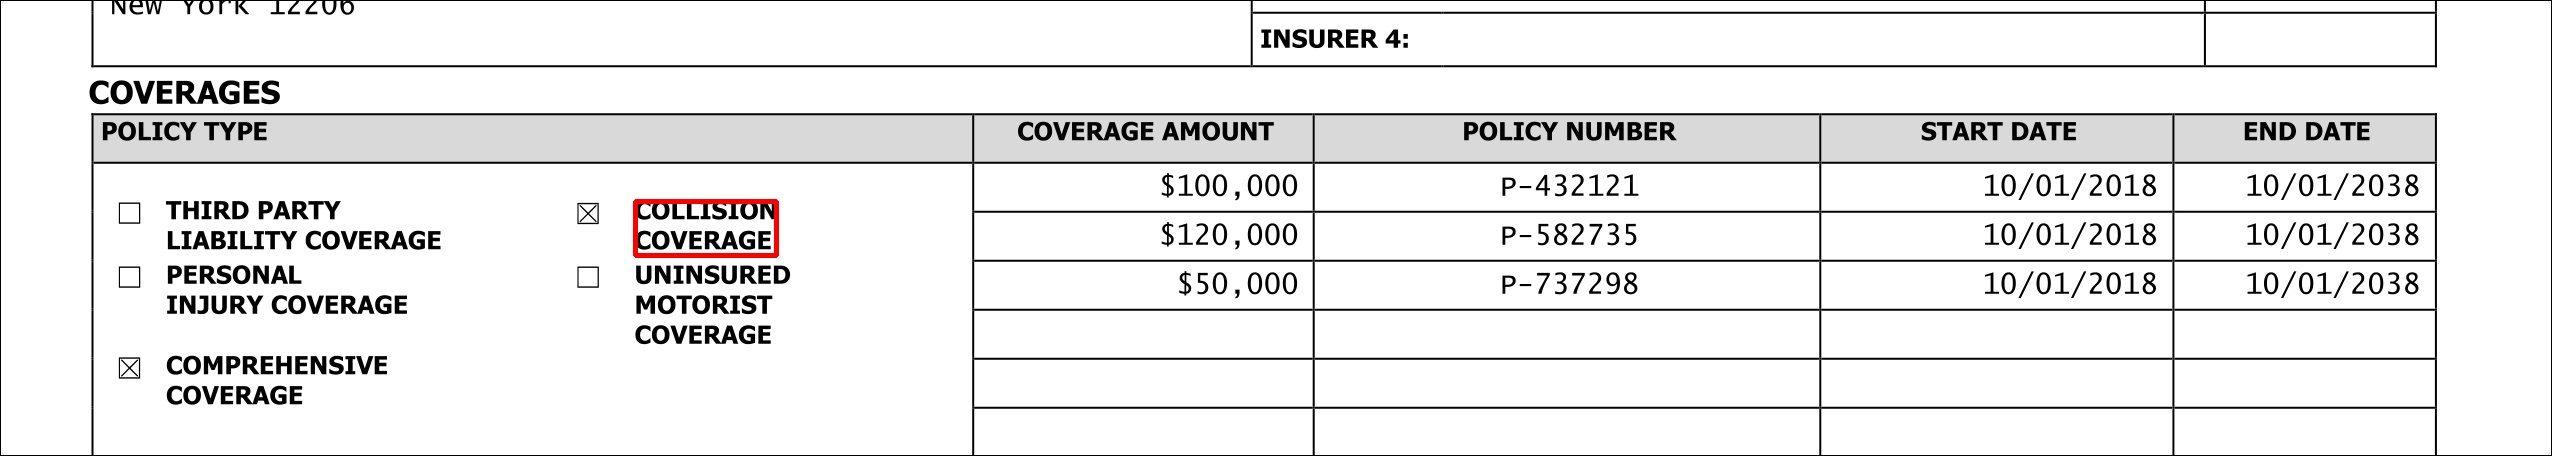

page = 1
anchor_text_bboxes = [[634, 1167, 155, 79]]
region_bboxes = [[634, 1167, 155, 79]]


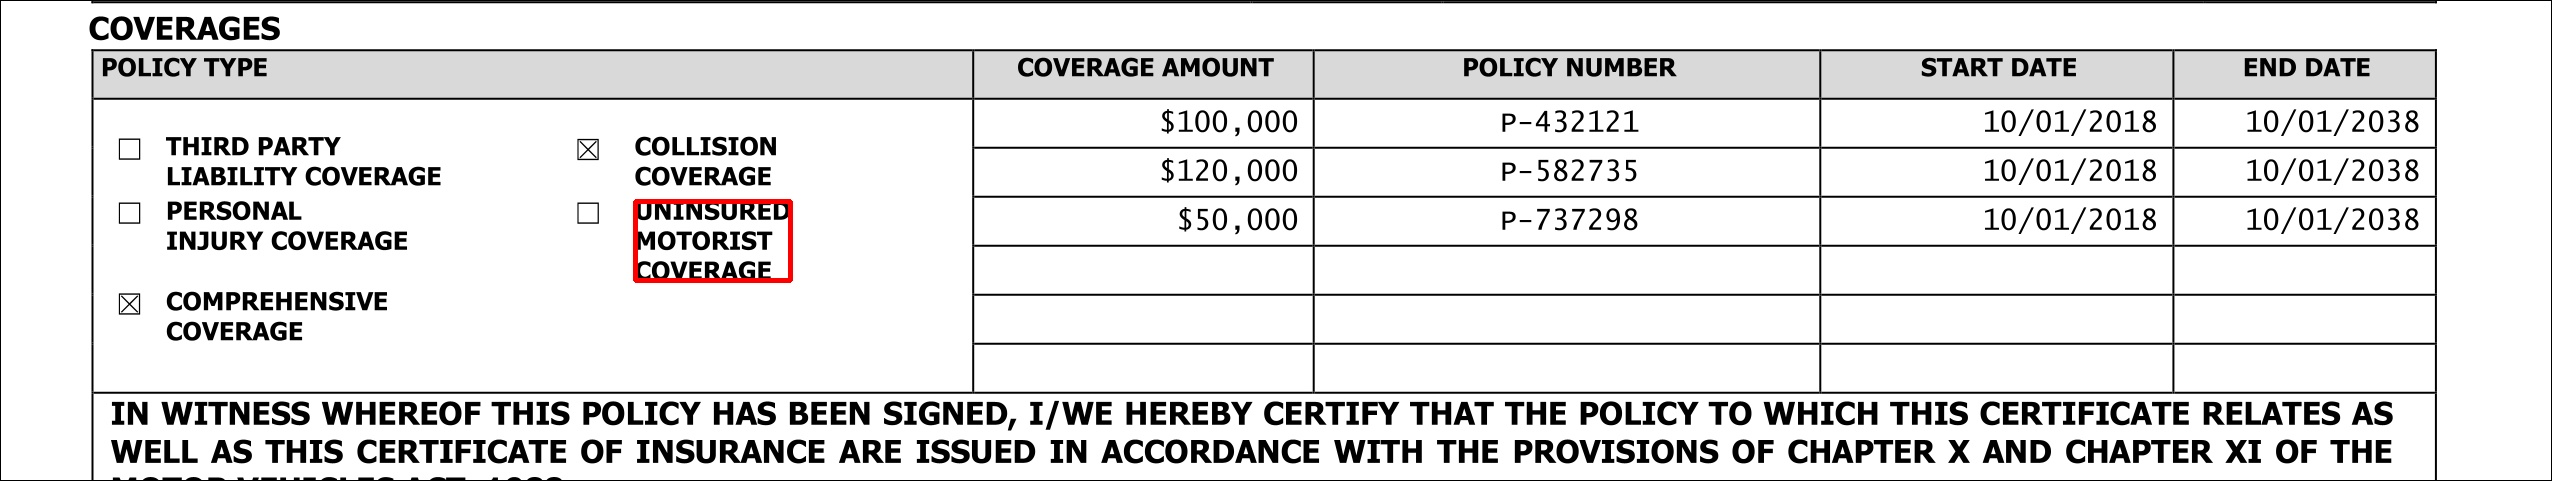

page = 1
anchor_text_bboxes = [[165, 1103, 275, 49]]
region_bboxes = [[165, 1103, 275, 49]]


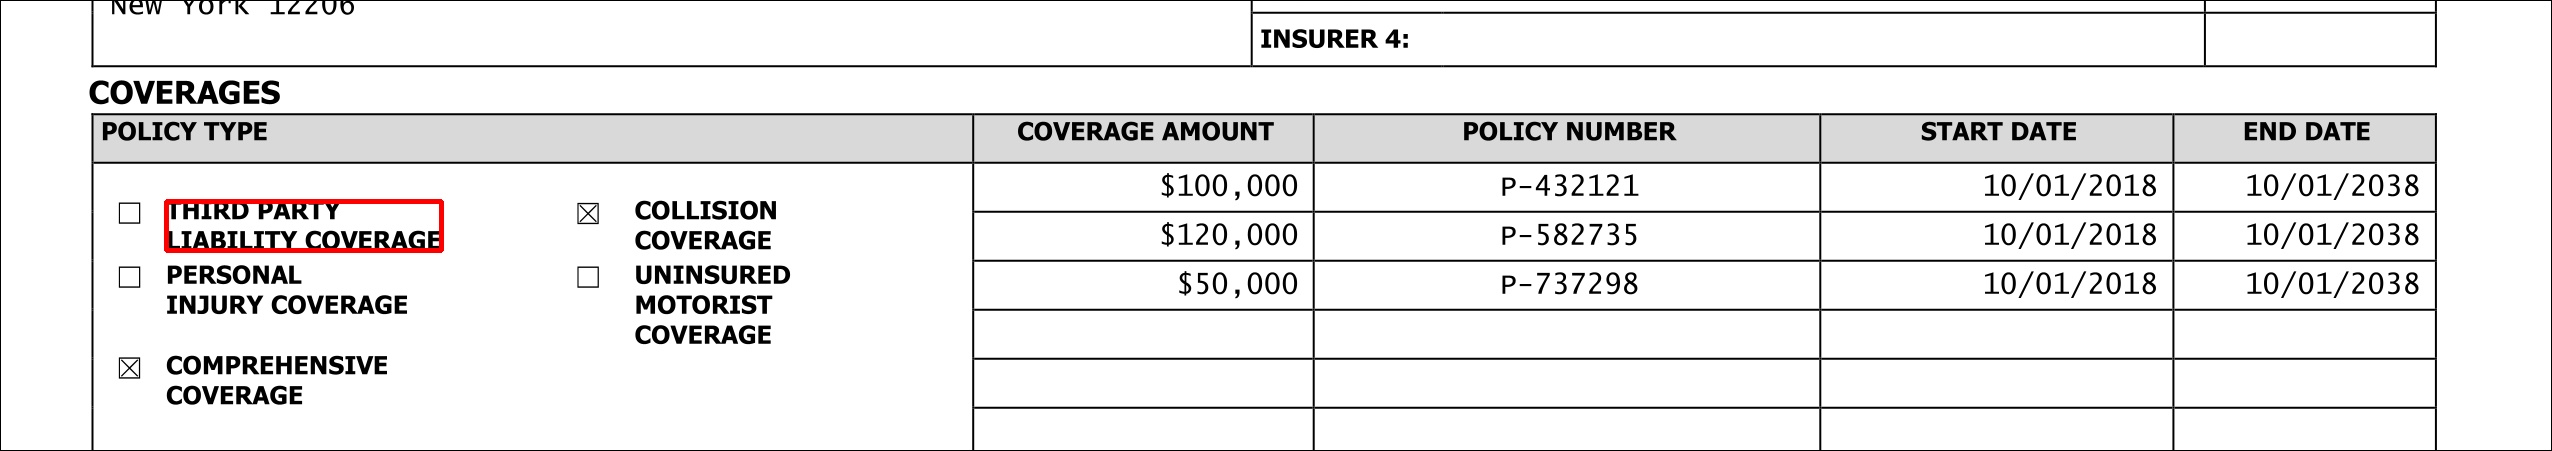

page = 1
anchor_text_bboxes = [[166, 1167, 240, 49]]
region_bboxes = [[166, 1167, 240, 49]]


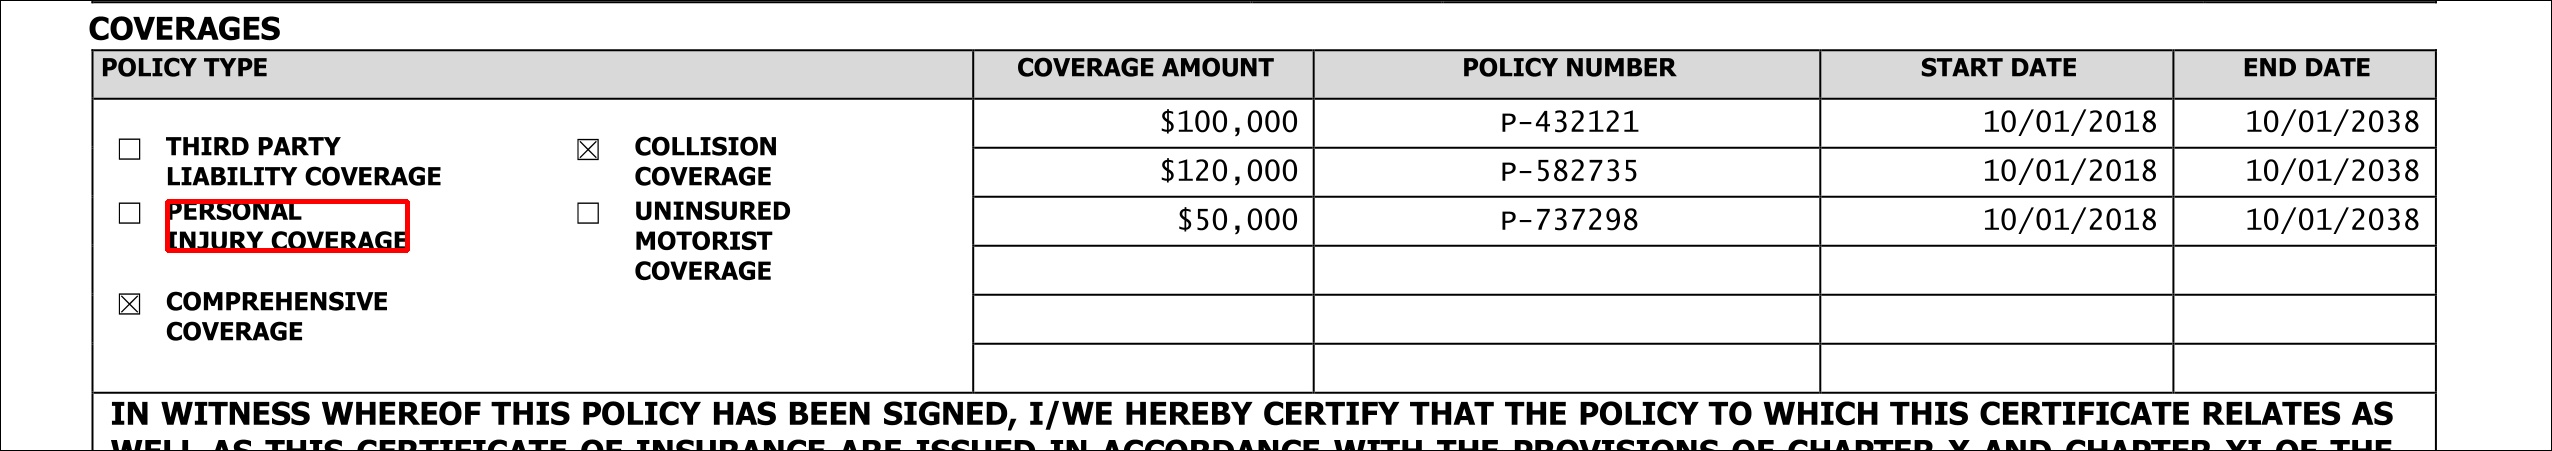

In [17]:
DemoHelper.visualize_get_bbox_for_result(result, IMAGE_PATHS)  

1. Using anchorText will get right side of value region by finding two rectangle points.
1. similarityScore given is 0.93, above which if match found for anchorText, it returns the bbox of it.
1. Each element in the inner arrays, represents synonym words and each element in the outer list represents multiline match.